In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import sys
sys.path.append('..')
import utils
import plot_utils
import main
import json

In [3]:
fold = "../../data/satellite/sst_rep_l4/"
files = utils.dirtodict(fold)[".files"]
ds = xr.open_mfdataset(files, combine="by_coords")
baseline_years = 30


# def crop_ds(ds, lat, lon):
#     ds_c = ds.sel(lat=slice(lat[0], lat[1]), lon=slice(lon[0], lon[1]))
#     return ds_c
# ds = crop_ds(ds, [37.5, 38.5], [1, 2])

lat_threshold = 42.878781
lon_threshold = 0.776363

ds = ds.where((ds.lat <= lat_threshold) | (ds.lon >= lon_threshold))

ds.analysed_sst.isel(time=0).plot()

In [10]:
baseline_year_length = 30
baseline_type = "fixed_baseline"
out_folder = "../../results/satellite/"

main.MHW_metrics_satellite(
    ds,
    baseline_year_length,
    baseline_type,
    out_folder=out_folder,
    var="analysed_sst",
    distribution=True,
    error=True,
)

2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 

In [3]:
baseline_year_length = 20
baseline_type = "moving_baseline"

ds_mhw, histogram = main.MHW_metrics_satellite(
    ds,
    baseline_year_length,
    baseline_type,
    var="analysed_sst",
    distribution=True,
    error=True,
)

2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 

TypeError: cannot unpack non-iterable NoneType object

In [100]:
path = "../../results/satellite/MHW_fixed_baseline_20_year/distributions.json"
with open(path, "r") as infile:
    loaded_data = json.load(infile)

dict

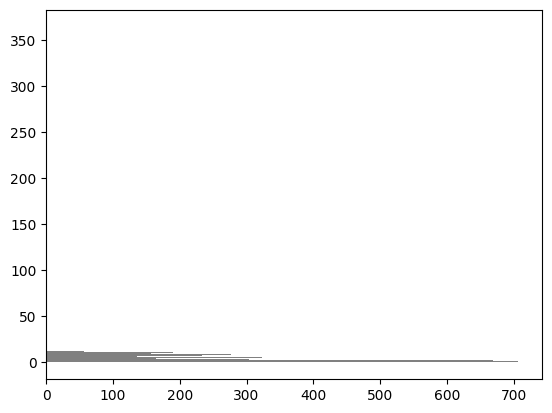

In [88]:
def plot_horizontal_histogram(hist, bin_edges):
    # Create the bar plot
    fig, ax = plt.subplots()
    bar_heights = np.diff(bin_edges)
    ax.barh(
        bin_edges[:-1],
        hist,
        height=np.diff(bin_edges),
        left=0,
        align="edge",
        color="gray",
    )
    # ax.set_ylim(0, 200)
    # ax.set_xlim(0,40000)


variable = "MHW_cat_3_days_year"
# variable = 'MHW_event_duration'
# variable = 'MHW_anual_cumulative_anomaly'
# variable = 'MHW_event_mean_anomaly'
plot_horizontal_histogram(histogram[variable]["hist"], histogram[variable]["bin_edges"])

In [59]:
histogram[variable]

[1.1460715017011012,
 1.2896406932543794,
 1.3180430422547051,
 1.3435450728221667,
 1.319227368051559,
 1.3525714083201348,
 1.3881772652199598,
 1.4008360128798276,
 1.3902668052005214,
 1.3564527661020276,
 1.296913674350159,
 2.003981723580315,
 2.0446979153540874,
 2.073654667023694,
 2.0881012947328657,
 2.0837087323588626,
 2.0735204553091457,
 2.058800810126845,
 2.0345837993006626,
 2.0150540259576624,
 1.9991100680443499,
 1.9976872269825303,
 1.9945188132665426,
 1.9797407580960187,
 1.9625895510437488,
 1.9427168651293794,
 2.0193577920236976,
 1.1900650516633164,
 1.1564752394153175,
 1.3132457117880563,
 1.3406440980972718,
 1.367180116714972,
 1.3393328266759081,
 1.3756099296605027,
 1.4123514061149893,
 1.4133012481548886,
 1.4044646513626975,
 1.369600920083883,
 1.3102848738569313,
 2.0321241809475907,
 2.0634626162949417,
 2.098476122784348,
 2.1171021820396447,
 2.113663868237571,
 2.1009403351814533,
 2.0864124913369437,
 2.066771804645498,
 2.051233435189848,
 2.

In [120]:
arr = np.full(365, np.nan)
num_sequences = 3  # You can change this value to control the number of sequences

for _ in range(num_sequences):
    start_idx = np.random.randint(0, 365 - 5)
    seq_len = np.random.randint(6, 10)  # You can adjust the range for sequence length
    arr[start_idx : start_idx + seq_len] = 1 + np.random.rand(seq_len)


ans = main.mhw_mean_anomaly_1d(arr)
ans

array([1.63339786, 1.36335738, 1.39604053,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan])

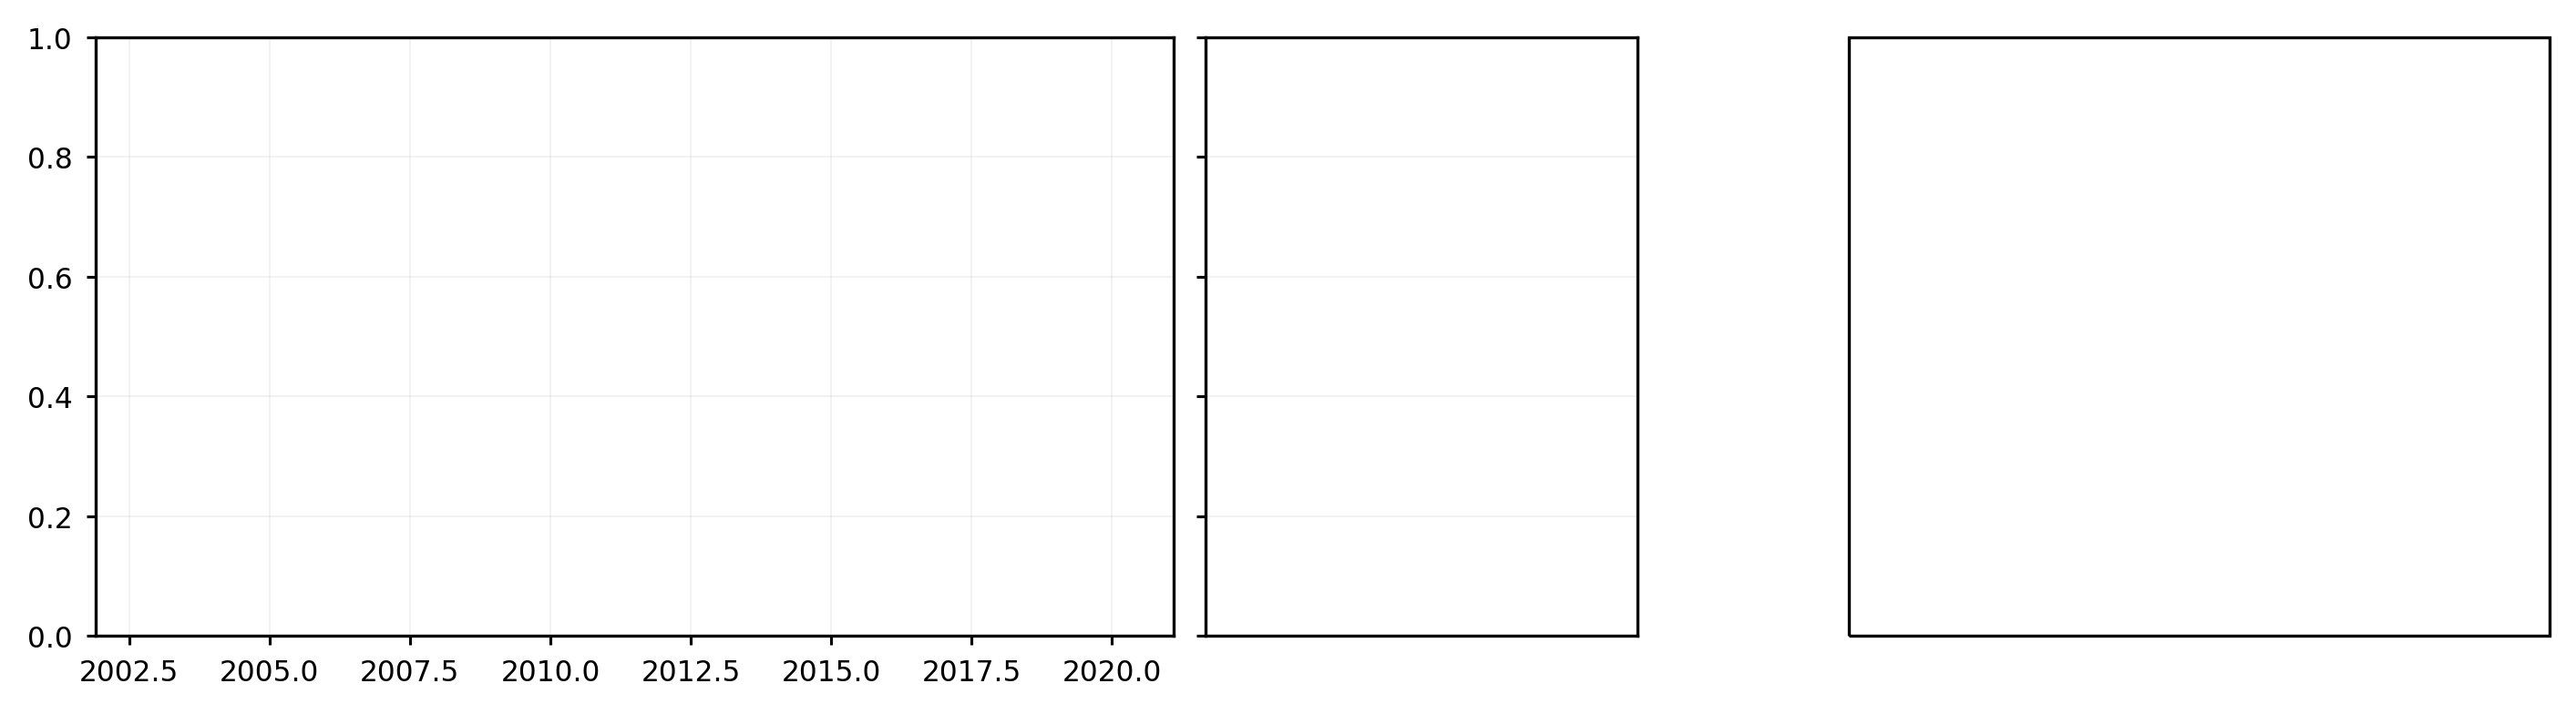

In [181]:
subplots = (1, 3)
text_size = 1

fig_size = 25
ratio = 4

extent = [-6.5, 36.5, 29.9, 46.2]

fs = np.sqrt(fig_size)
fig = plt.figure(
    figsize=(np.sqrt(ratio * fig_size), np.sqrt(fig_size / ratio)),
    dpi=300,
    layout="constrained",
)
gs = mpl.gridspec.GridSpec(
    subplots[0], subplots[1], width_ratios=(3, 1.2, 3), figure=fig
)
ax = [[None] * subplots[1] for _ in range(subplots[0])]
lims = [[0, 100], [0, 3], [0, 250]]

for i in range(subplots[0]):
    for j in range(subplots[1]):
        if j == 2:
            ax[i][j] = fig.add_subplot(gs[i, j], projection=ccrs.Mercator())
        else:
            ax[i][j] = fig.add_subplot(gs[i, j])
            ax[i][j].grid(which="major", linewidth=fs * 0.015)
            ax[i][j].xaxis.set_tick_params(which="minor", bottom=False)
            ax[i][j].tick_params(
                axis="both",
                which="major",
                labelsize=1.5 * text_size * fs,
                size=fs * 0.5,
                width=fs * 0.15,
            )
        if j == 1:
            ax[i][j].set_xticks([])
            ax[i][j].set_yticklabels([])
            ax[i][j].set_ylim(lims[i])

        if j == 0:
            # plot_utils.err_plot(ax[i][j], x_axis, time_series[baseline][metrics[i]]['MHW'],
            #             (time_series[baseline][metrics[i]]['MHW_positive'],
            #             time_series[baseline][metrics[i]]['MHW_negative']), 'MHW', fs, label_leg=label_legs[i])
            ax[i][j].set_xlim([2001.9, 2021.1])

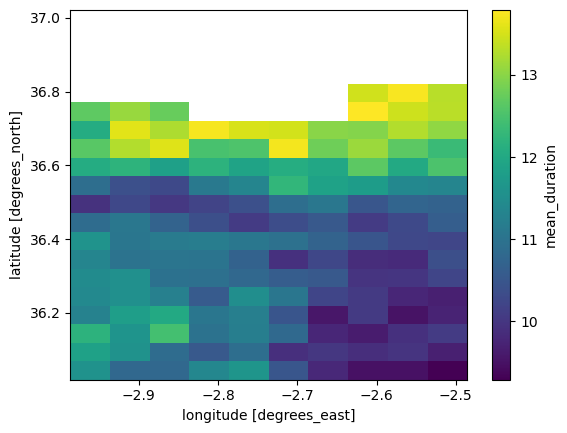

In [162]:
ds_mhw["mean_duration"].mean("time").plot()

In [154]:
mhw_ = mhw[:, 5, 0]

a = main.mhw_duration_1d(mhw_)
a

array([17.,  7.,  7., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [150]:
aa = main.find_mhw_durations(mhw)
aa
# np.nanmean(aa, axis=0)

array([[[12., 12.,  9., ...,  6.,  6.,  6.],
        [13.,  9.,  9., ...,  9.,  9.,  6.],
        [12., 16., 15., ...,  9.,  9.,  9.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 6., nan,  5., ..., nan, nan, nan],
        [ 7.,  7.,  5., ..., nan, nan, nan],
        [ 7.,  7.,  6., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  5., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [137]:
nonzero_not_nan_list = main.nonzero_and_not_nan(aa)
# print(nonzero_not_nan_list)
len(nonzero_not_nan_list)

530

In [119]:
ds_mhw["mean_anomaly"].isel(time=0)

<xarray.DataArray 'mean_anomaly' (lat: 10, lon: 10)>
array([[1.45528812, 1.47029401, 1.48499229, 1.49382741, 1.50293879,
        1.4997596 , 1.60663032, 1.52490114, 1.49855908, 1.43979941],
       [1.43997862, 1.4793396 , 1.4938798 , 1.50180328, 1.58822394,
        1.51784921, 1.50709165, 1.52507484, 1.440463  , 1.45981934],
       [1.48704101, 1.49021292, 1.49856567, 1.60627283, 1.60632012,
        1.48711619, 1.50269654, 1.52406284, 1.46295992, 1.46621035],
       [1.50429479, 1.53049855, 1.5315181 , 1.56787341, 1.56586203,
        1.56443824, 1.60171576, 1.60318227, 1.60411989, 1.53983322],
       [1.47989659, 1.47525625, 1.46910834, 1.47157352, 1.4935954 ,
        1.56258055, 1.59830075, 1.60311607, 1.60027664, 1.53870909],
       [1.40564257, 1.48059806, 1.40938747, 1.41000668, 1.41234531,
        1.4833892 , 1.57753863, 1.57690725, 1.56793759, 1.53748398],
       [1.46008344, 1.37710152, 1.43763943, 1.38386819, 1.34201717,
        1.31753904, 1.55095943, 1.55237382, 1.54995326, 1.53241389],
       [1.42662272, 1.35864061, 1.37726034, 1.3722178 , 1.30882561,
        1.48625007, 1.53196993, 1.52379369, 1.52485075, 1.46600243],
       [1.4215524 , 1.40297212, 1.39747577, 1.41172875, 1.32568345,
        1.50257721, 1.49964633, 1.49112296, 1.44802695, 1.47250802],
       [1.60340978, 1.5168351 , 1.49210265, 1.5569082 , 1.55326267,
        1.53652624, 1.51439898, 1.42757905, 1.41019039, 1.34535743]])
Coordinates:
    time     int64 2002
  * lat      (lat) float32 36.04 36.09 36.14 36.19 ... 36.34 36.39 36.44 36.5
  * lon      (lon) float32 -2.961 -2.911 -2.861 -2.811 ... -2.611 -2.561 -2.511

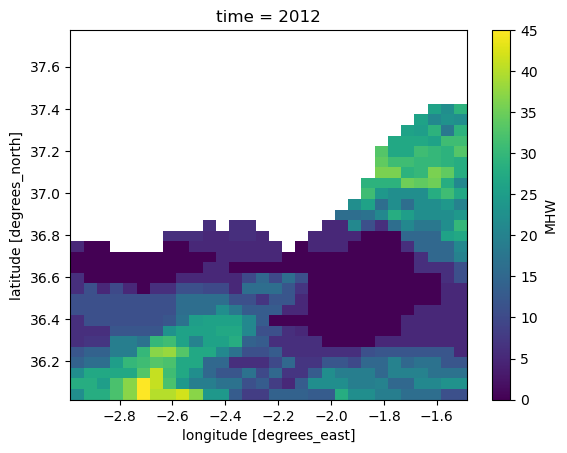

In [89]:
ds_mhw.MHW.isel(time=10).plot()

In [96]:
from xarrayMannKendall import Mann_Kendall_test

sst = ds_c.analysed_sst
# Rolling mean
roll = 365
sst = sst.rolling(time=roll, center=True).mean().compute()
lim = roll // 2
sst = sst.isel(time=slice(lim, -lim))
sst = sst.fillna(1e10)


tke_trends = Mann_Kendall_test(
    sst,
    dim="time",
    MK_modified=True,
    method="linregress",
    alpha=0.05,
    coords_name={"time": "time", "x": "lon", "y": "lat"},
)

sst_trends = tke_trends.compute()

/home/prossello/EKE_two_all_sat/.conda/lib/python3.9/site-packages/xarrayMannKendall/decorators.py:38: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  self.DataArray = self.DataArray.rename(rename_dict)


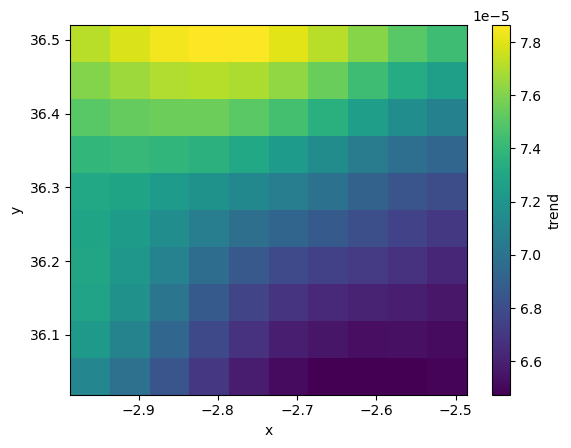

In [99]:
sst_trends["trend"].plot()

In [63]:
y_i = ds_c.time.dt.year.min().item()
y_f = ds_c.time.dt.year.max().item()

grouped_years = ds_c.groupby("time.year")
for year, group in grouped_years:
    if year <= y_i + baseline_years - 1:
        continue
    if ds.time.dtype == "datetime64[ns]":
        group = group.where(~(group.time.dt.dayofyear == 366), drop=True)

    year_thresholds = thresholds.sel(dayofyear=group.time.dt.dayofyear)
    mhs = (
        (group["analysed_sst"] > year_thresholds["pctl"])
        .where(year_thresholds["pctl"].notnull())
        .values
    )
    anomaly = (group["analysed_sst"] - year_thresholds["clim"]).values

In [64]:
baseline_year_length = 20
baseline_type = "fixed_baseline"

ds_mhw = main.MHW_metrics(ds_c, baseline_year_length, baseline_type, var="analysed_sst")

64


KeyboardInterrupt: 